In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import warnings
import string
import nltk
from nltk.corpus import stopwords
from tensorflow import keras

In [2]:
#read the twitter csv file
from google.colab import files

uploaded=files.upload()

Saving Twitter_Data.csv to Twitter_Data.csv


In [3]:
data_twitter=pd.read_csv("Twitter_Data.csv")

In [4]:
#read the reddit csv file
from google.colab import files

uploaded=files.upload()

Saving Reddit_Data.csv to Reddit_Data.csv


In [5]:
data_reddit=pd.read_csv("Reddit_Data.csv")

In [6]:
#displays the number of columns and rows in twitter data
data_twitter.shape

(162980, 2)

EXPLORATORY DATA ANALYSIS

In [7]:
#rename the column name of twitter
data_twitter.columns=data_twitter.columns.str.replace('clean_text', 'clean_comment')


In [8]:
data_twitter.columns

Index(['clean_comment', 'category'], dtype='object')

In [9]:
data_reddit.columns

Index(['clean_comment', 'category'], dtype='object')

In [10]:
#merge the twitter and reddit dataset into a single one
data=pd.concat([data_reddit, data_twitter]).reset_index(drop=True)

In [11]:
#display the top 5 rows
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1.0
1,buddhism has very much lot compatible with chr...,1.0
2,seriously don say thing first all they won get...,-1.0
3,what you have learned yours and only yours wha...,0.0
4,for your own benefit you may want read living ...,1.0


In [12]:
data.shape

(200229, 2)

In [13]:
#map the sentiment 0- neutral, 1- positive and -1 negative
map_category={-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}
data['category_new']=data['category'].replace(map_category)
data.head()

,clean_comment,category,category_new
0,family mormon have never tried explain them t...,1.0,Positive
1,buddhism has very much lot compatible with chr...,1.0,Positive
2,seriously don say thing first all they won get...,-1.0,Negative
3,what you have learned yours and only yours wha...,0.0,Neutral
4,for your own benefit you may want read living ...,1.0,Positive


In [14]:
# Check for the null data
data.isnull().sum()

clean_comment    104
category           7
category_new       7
dtype: int64

In [15]:
#remove null values if any
data.dropna(axis=0,inplace=True)

In [16]:
data.shape

(200118, 3)

VISUALIZATION

<Axes: xlabel='category'>

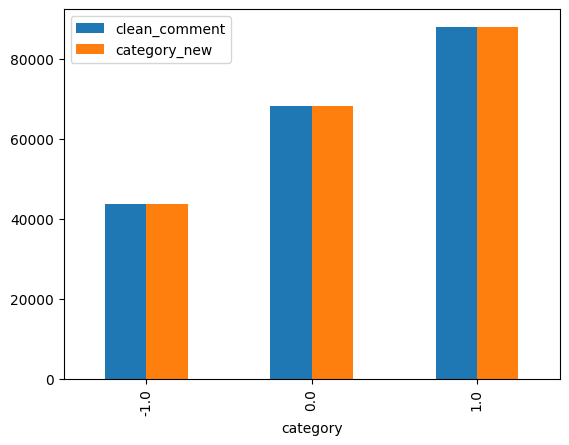

In [17]:
data.groupby('category').count().plot(kind='bar')

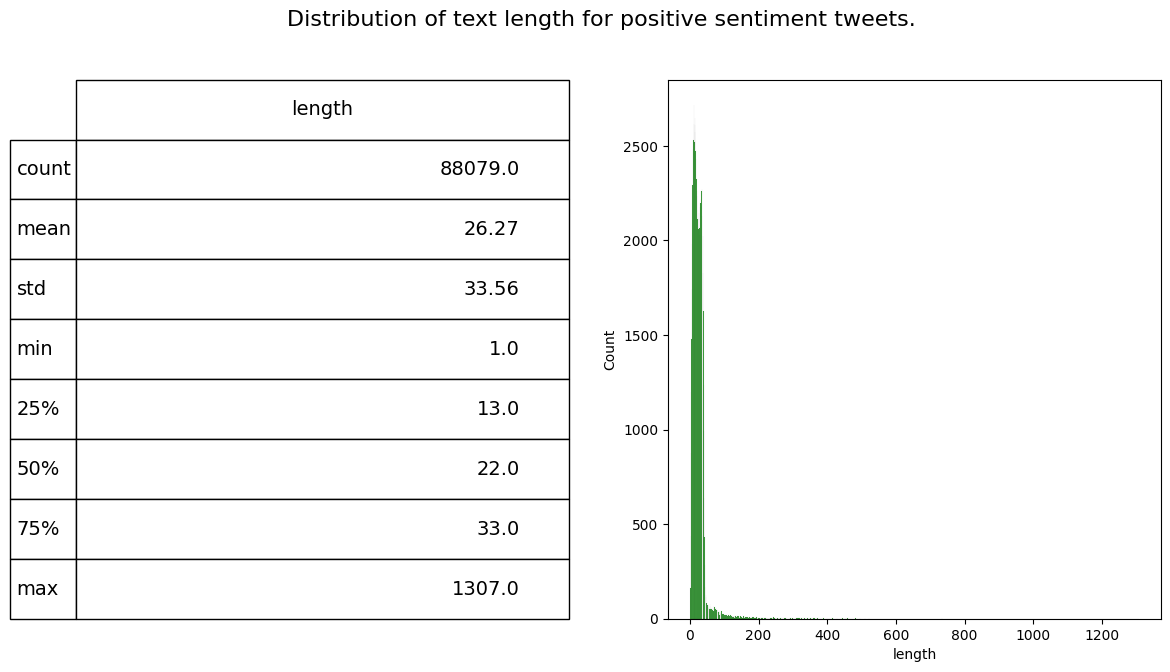

In [18]:
fig=plt.figure(figsize=(14,7))
data['length']=data.clean_comment.str.split().apply(len)
ax1=fig.add_subplot(122)
sns.histplot(data[data['category']==1.0]['length'],ax=ax1,color='green')
describe=data.length[data.category==1.0].describe().to_frame().round(2)
ax2=fig.add_subplot(121)
ax2.axis('off')
font_size=14
bbox=[0, 0, 1, 1]
table=ax2.table(cellText=describe.values,rowLabels=describe.index,bbox=bbox,colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)
plt.show()

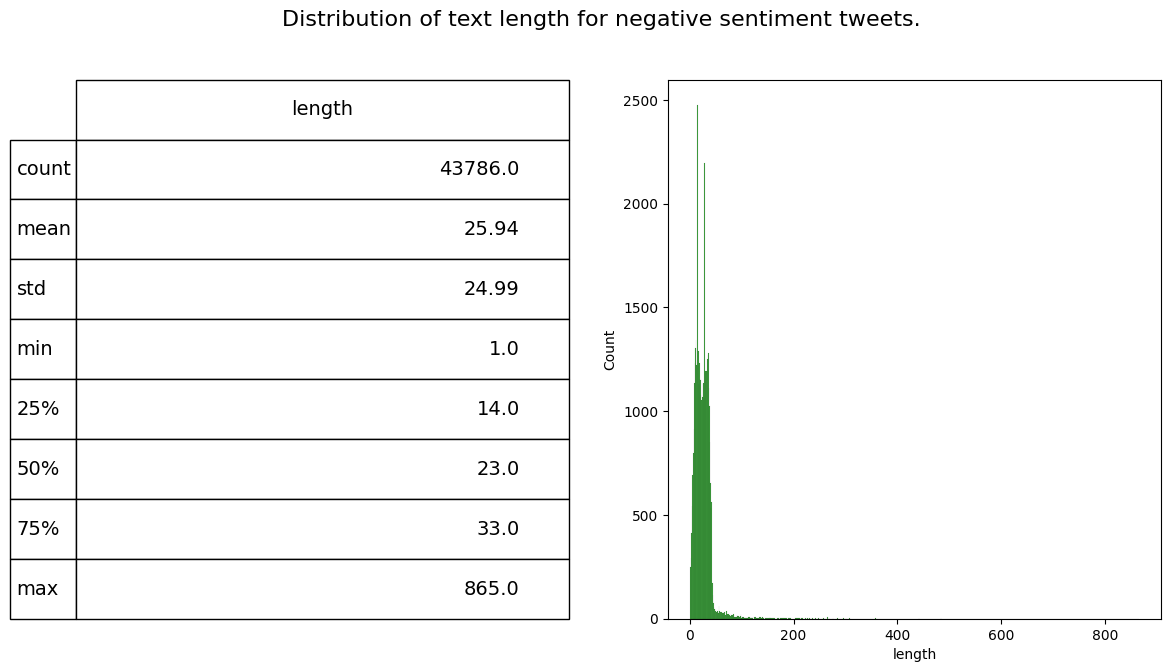

In [19]:
fig=plt.figure(figsize=(14,7))
data['length']=data.clean_comment.str.split().apply(len)
ax1=fig.add_subplot(122)
sns.histplot(data[data['category']==-1.0]['length'],ax=ax1,color='green')
describe=data.length[data.category==-1.0].describe().to_frame().round(2)
ax2=fig.add_subplot(121)
ax2.axis('off')
font_size=14
bbox=[0, 0, 1, 1]
table=ax2.table(cellText=describe.values,rowLabels=describe.index,bbox=bbox,colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=16)
plt.show()

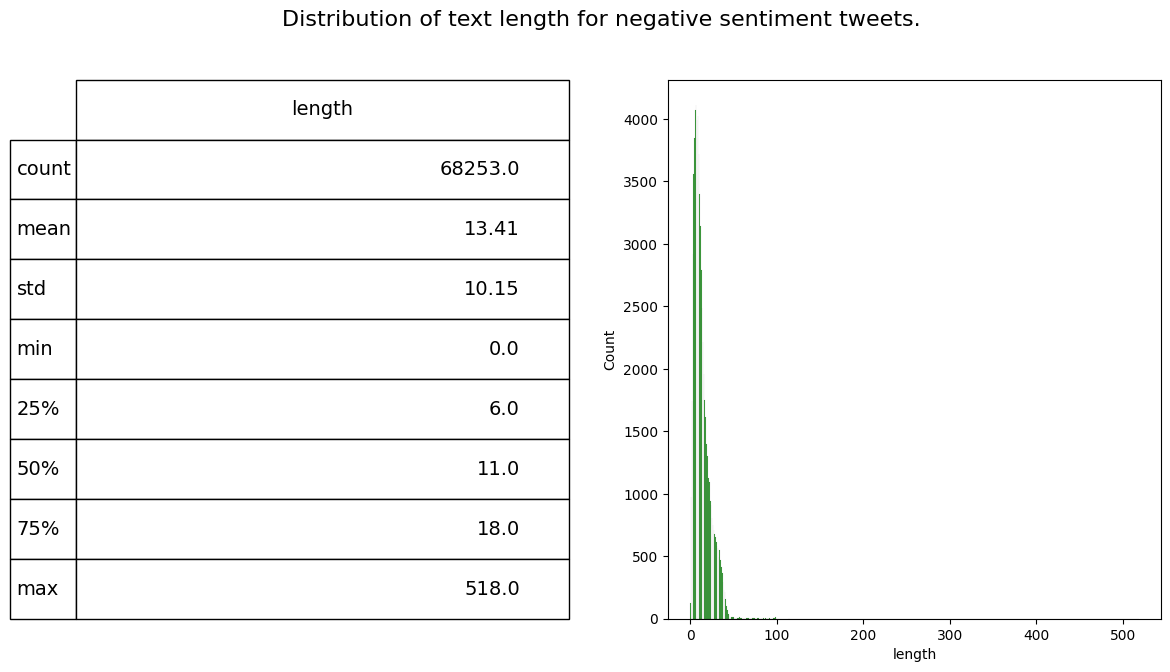

In [20]:
fig=plt.figure(figsize=(14,7))
data['length']=data.clean_comment.str.split().apply(len)
ax1=fig.add_subplot(122)
sns.histplot(data[data['category']==0]['length'],ax=ax1,color='green')
describe=data.length[data.category==0].describe().to_frame().round(2)
ax2=fig.add_subplot(121)
ax2.axis('off')
font_size=14
bbox=[0, 0, 1, 1]
table=ax2.table(cellText=describe.values,rowLabels=describe.index,bbox=bbox,colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=16)
plt.show()

#### Some code are not displaying while running on colab, so i run the same code in different platform and output is attached

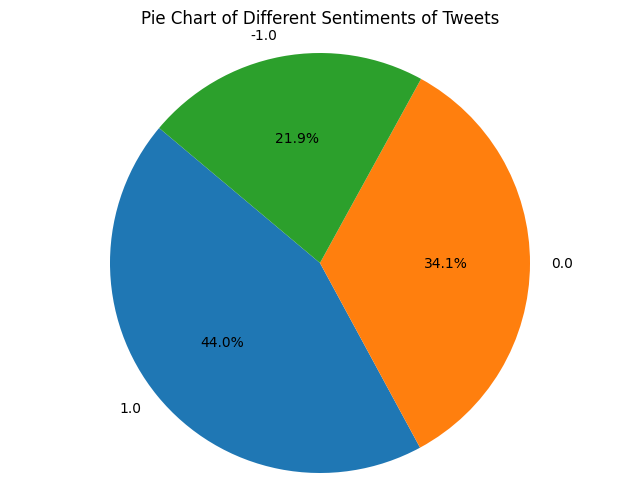

In [21]:
import matplotlib.pyplot as plt
count_sentiments=data['category'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(count_sentiments,labels=count_sentiments.index,autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Different Sentiments of Tweets')
plt.axis('equal')
plt.show()

In [22]:
#string count distribution
import pandas as pd
import plotly.express as px
data2=pd.DataFrame(data['clean_comment'].str.len(),columns=['String Length'])
fig=px.histogram(data2,x='String Length',nbins=70,title='String Length Distribution of Data')
fig.update_layout(xaxis_title='String length', yaxis_title='Count', bargap=0.1)
fig.show()

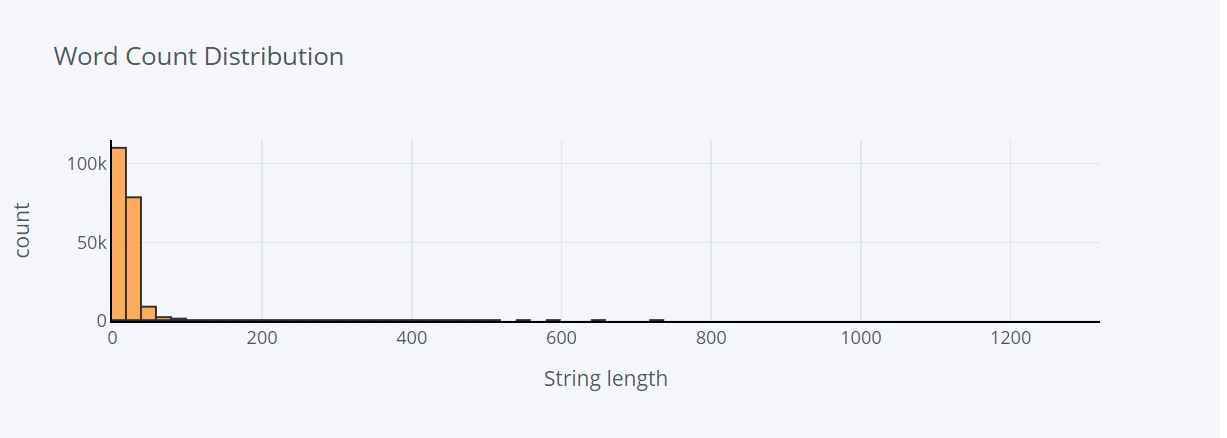

In [23]:
# word count distribution
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
data['word_count']=data['clean_comment'].str.split().str.len()
fig=go.Figure(data=[go.Histogram(x=data['word_count'],nbinsx=70)])
fig.update_layout(
    title='Word Count Distribution',
    xaxis_title='Word Count',
    yaxis_title='Count',
    bargap=0.1,
    showlegend=False
)
fig.show()

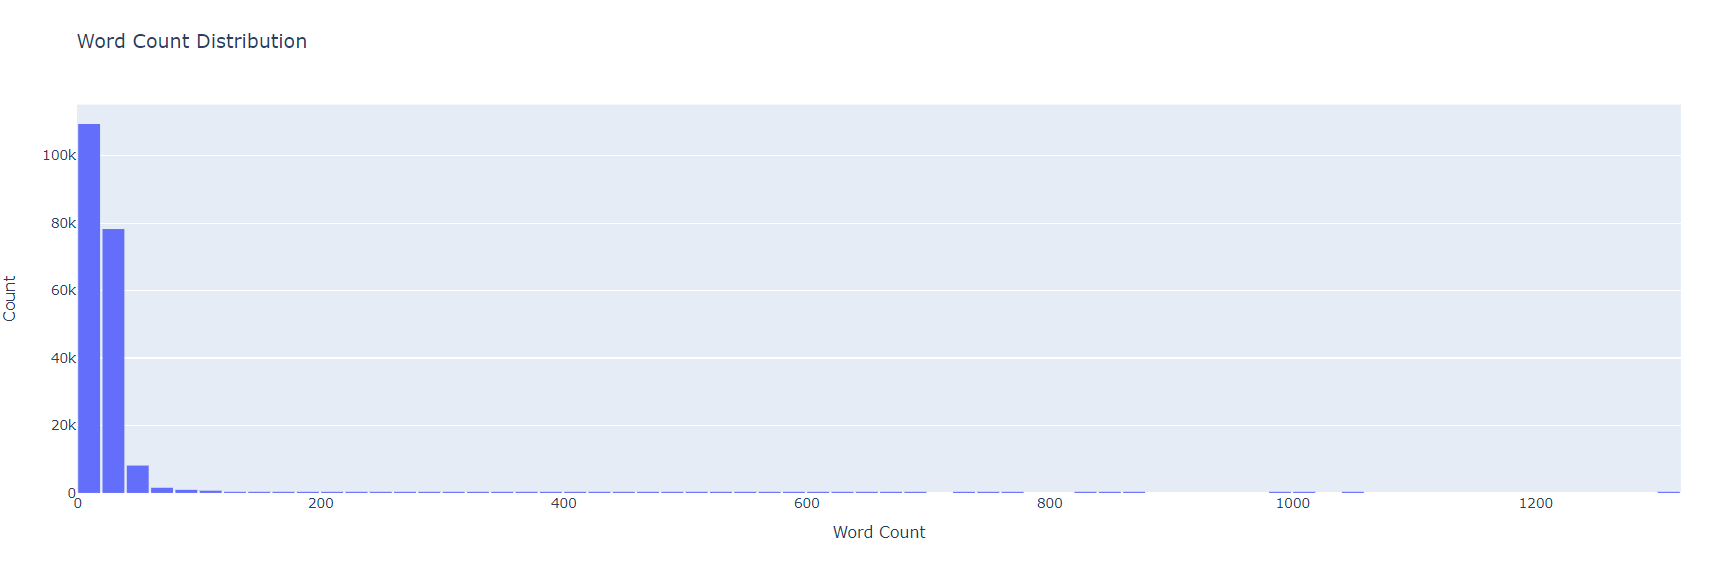

In [24]:
##Top 30 Word Distribution

import pandas as pd
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus,n=None):
    vec=CountVectorizer().fit(corpus)
    word_bag=vec.transform(corpus)
    words_sum=word_bag.sum(axis=0)
    words_frequency=[(word,words_sum[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_frequency=sorted(words_frequency, key = lambda x: x[1], reverse=True)
    return words_frequency[:n]

words_common=get_top_n_words(data['clean_comment'].dropna().tolist(),30)
data1=pd.DataFrame(words_common, columns=['ReviewText', 'count'])
data1_grouped=data1.groupby('ReviewText').sum()['count'].sort_values(ascending=False)
fig=px.bar(data1_grouped, x=data1_grouped.index, y='count', title='Top 30 words Combined')
fig.update_layout(yaxis_title='Count', xaxis_tickangle=-45, bargap=0.1)
fig.show()

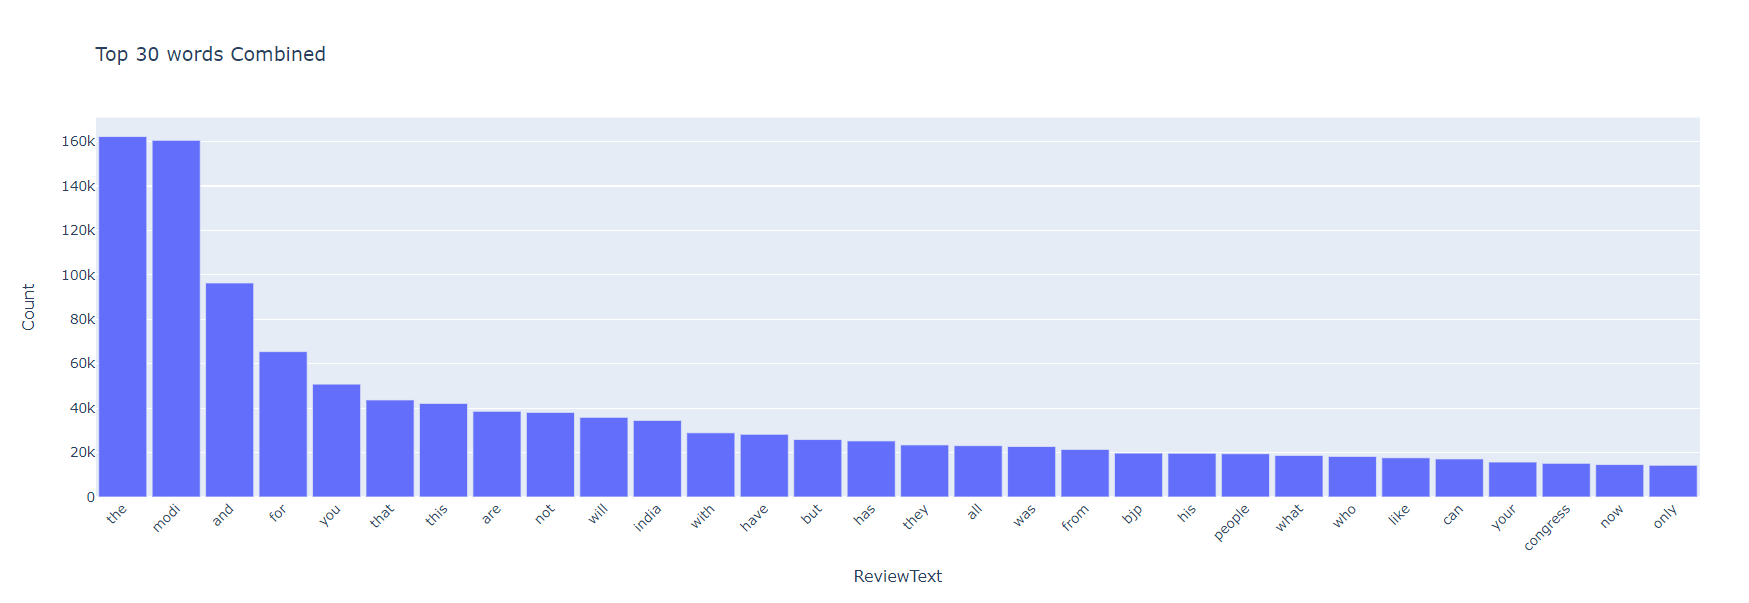

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2307 (\N{DEVANAGARI SIGN VISARGA}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Matplotlib currently does not support Devanagari natively.



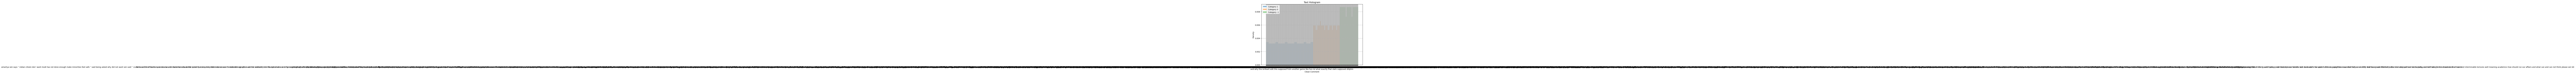

In [25]:
import matplotlib.pyplot as plt

data_sample = data.head(600)
# Group the data by 'category' and count the occurrences of each category
category_counts=data_sample['category'].value_counts()
plt.rcParams['font.family'] = 'sans-serif'
#Plot a histogram
plt.figure(figsize=(10, 6))
for category, count in category_counts.items():
    plt.hist(data_sample[data_sample['category'] == category]['clean_comment'],
             bins=20, alpha=0.5, label=f'Category {int(category)}', density=True)

plt.title('Text Histogram')
plt.xlabel('Clean Comment')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


As the above code is not working properly here, i run this same code in jupyter and output is attached

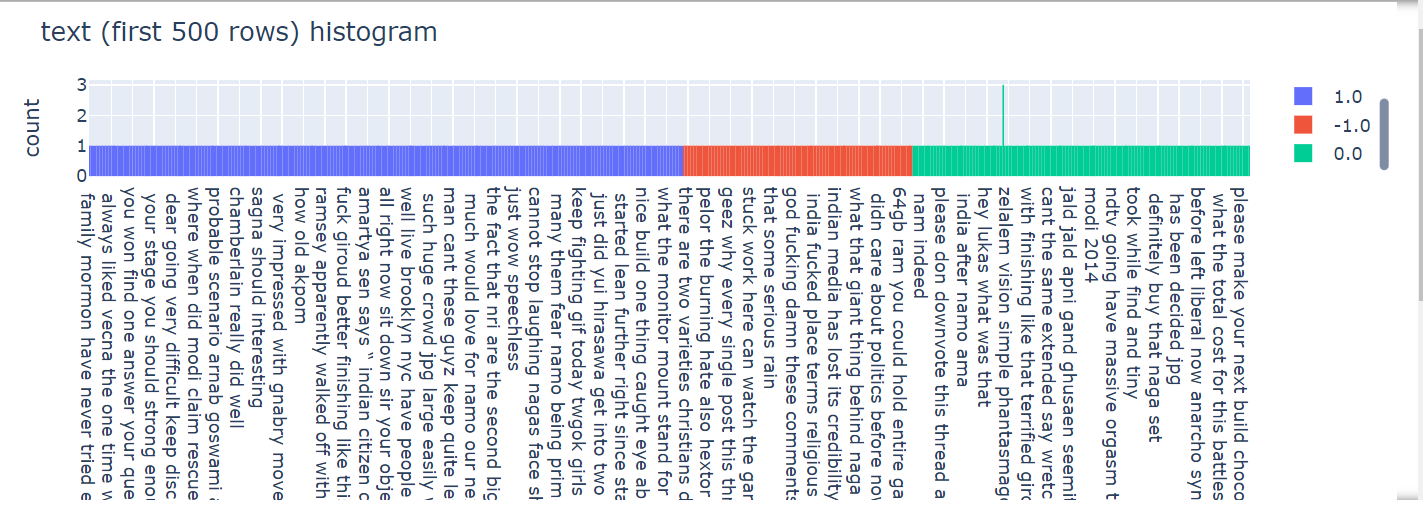

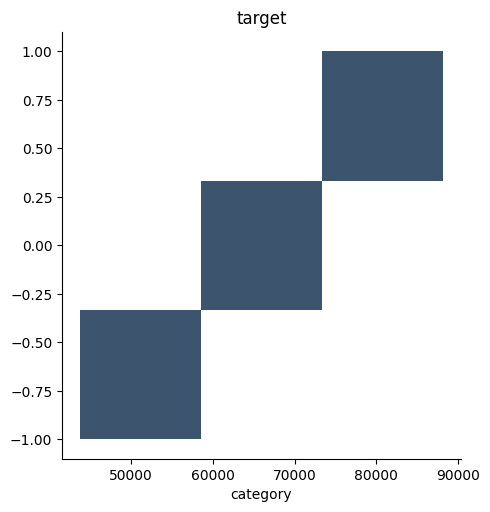

In [26]:
## Target Distribution
locations_vector=data["category"].value_counts()
sns.displot(y=locations_vector.index,x=locations_vector)
plt.title("target ")
plt.show()


<ipython-input-27-4a92af58723d>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='clean_comment', ylabel='Density'>

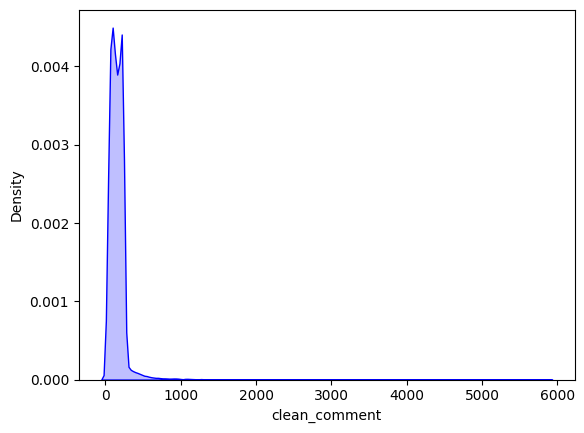

In [27]:
sns.kdeplot(data[data['category']==-1.0]['clean_comment'].str.len(),shade=True,color='blue')

<ipython-input-28-06ba1af1c563>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='clean_comment', ylabel='Density'>

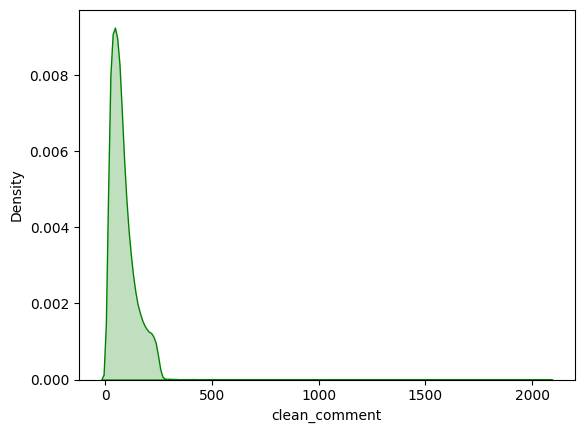

In [28]:
sns.kdeplot(data[data['category']==0]['clean_comment'].str.len(),shade=True,color= 'green')

<ipython-input-29-32c61ba798dd>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='clean_comment', ylabel='Density'>

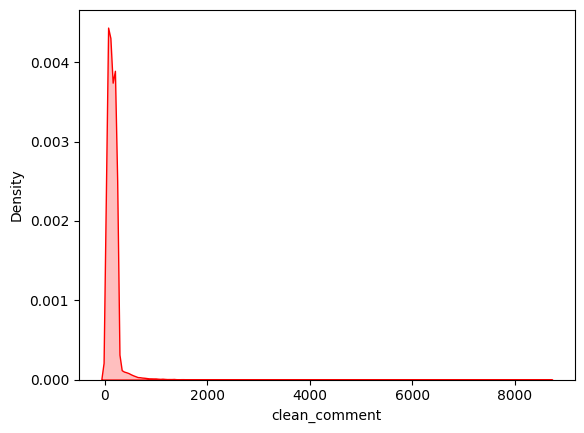

In [29]:
sns.kdeplot(data[data['category']==1]['clean_comment'].str.len(),shade=True,color= 'red')

<ipython-input-30-0fd2f521575b>:4: UserWarning:

KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.



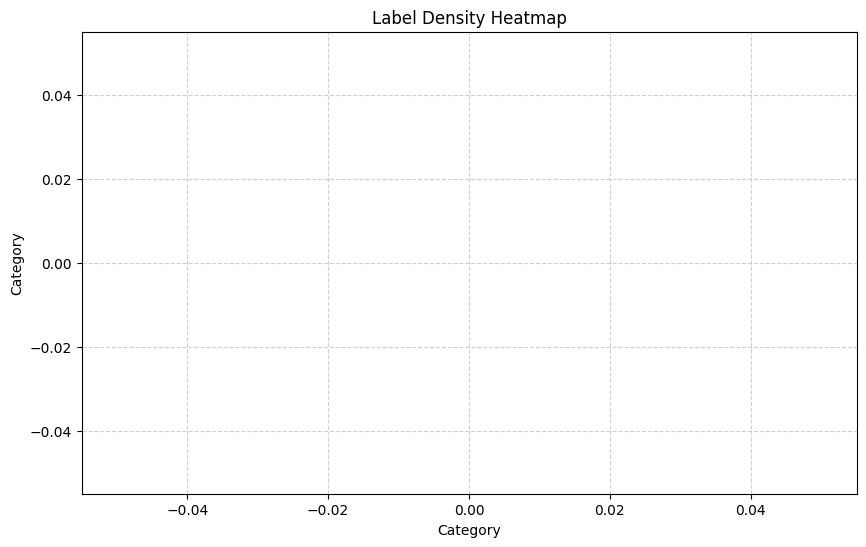

In [30]:
import seaborn as sns
# Create a density heatmap
plt.figure(figsize=(10,6))
sns.kdeplot(data=data,x='category',y='category',fill=True,cmap="viridis",levels=100)
plt.title('Label Density Heatmap')
plt.xlabel('Category')
plt.ylabel('Category')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Since the above code didn't worked in collab, i run this code in jupyter and output is attached

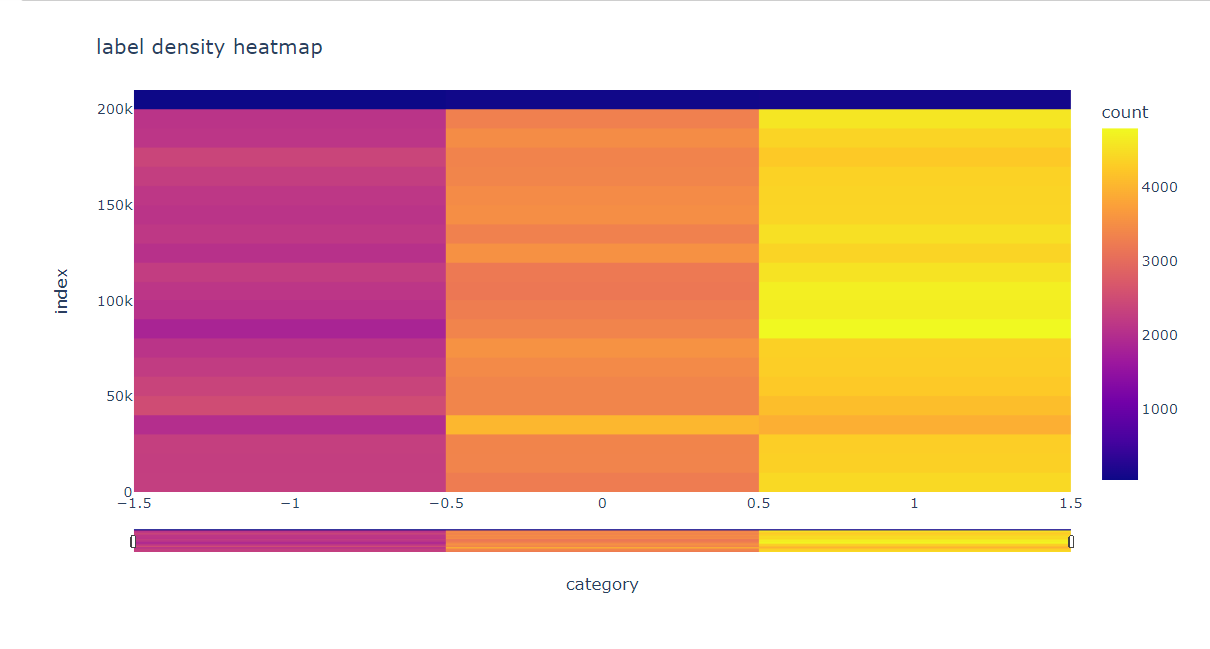

In [31]:
data.corr()

<ipython-input-31-c44ded798807>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,category,length,word_count
category,1.000000,0.051066,0.051066
length,0.051066,1.000000,1.000000
word_count,0.051066,1.000000,1.000000


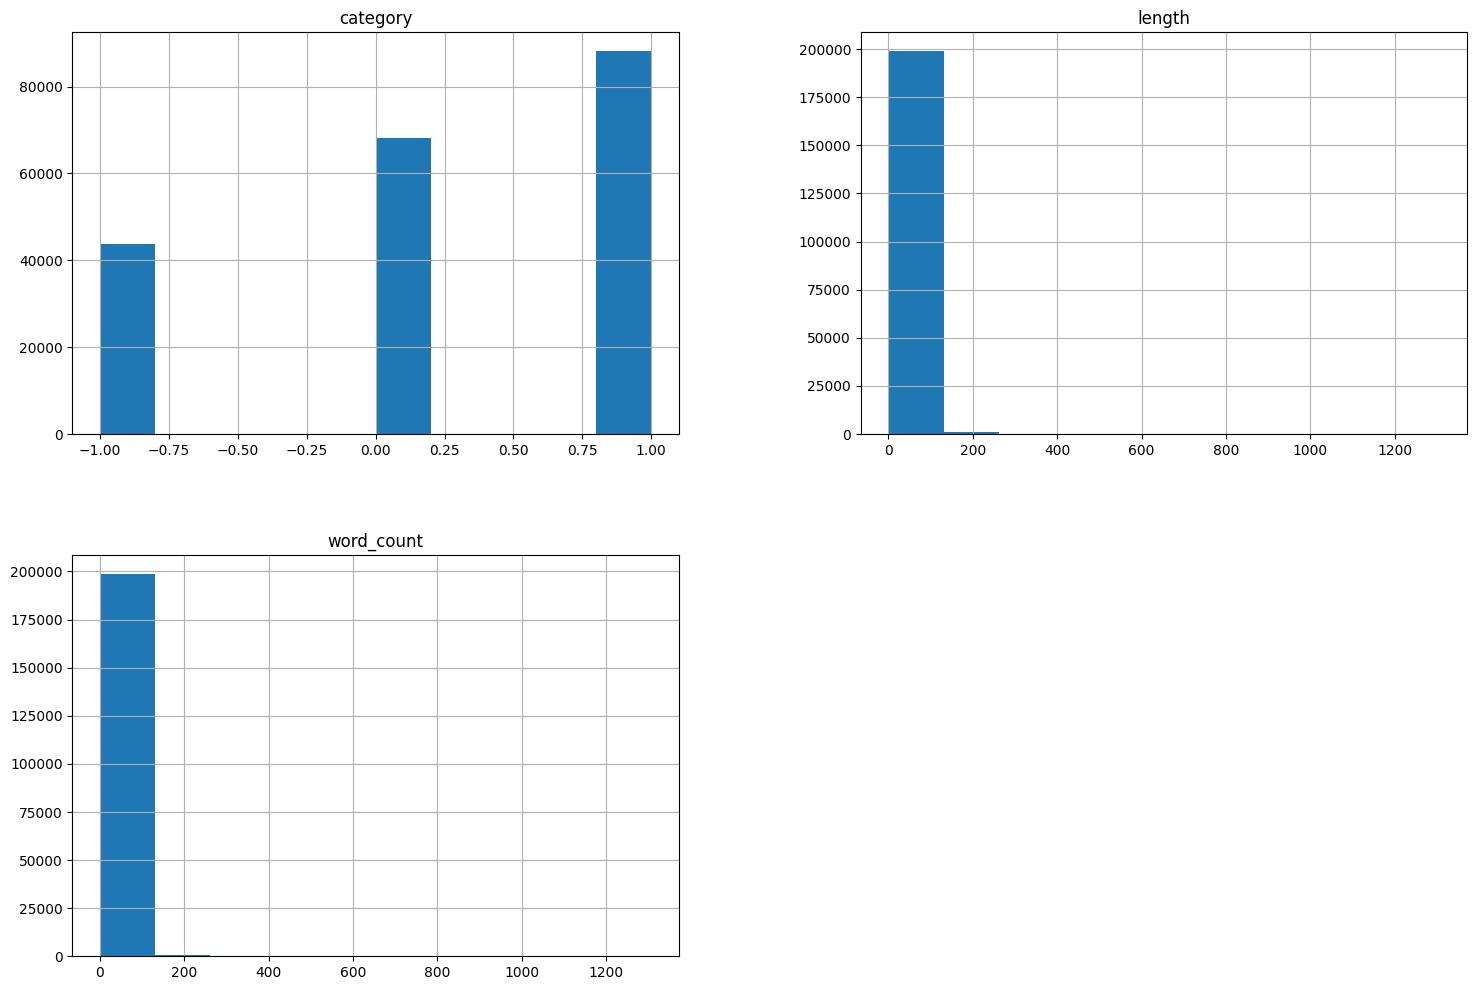

In [32]:
data.hist(figsize=(18,12))
plt.show()

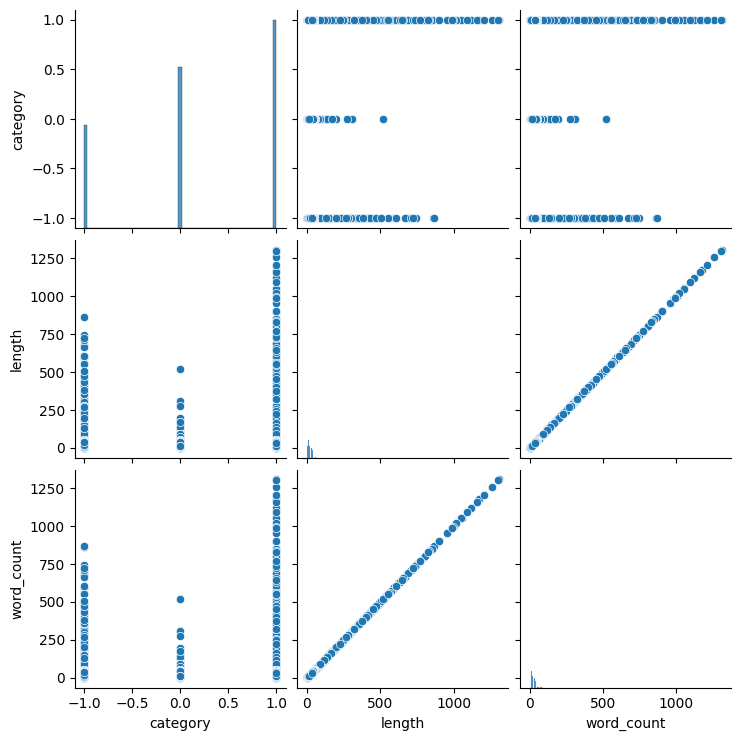

In [33]:
sns.pairplot(data=data)

<ipython-input-34-7b00c84c4dde>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

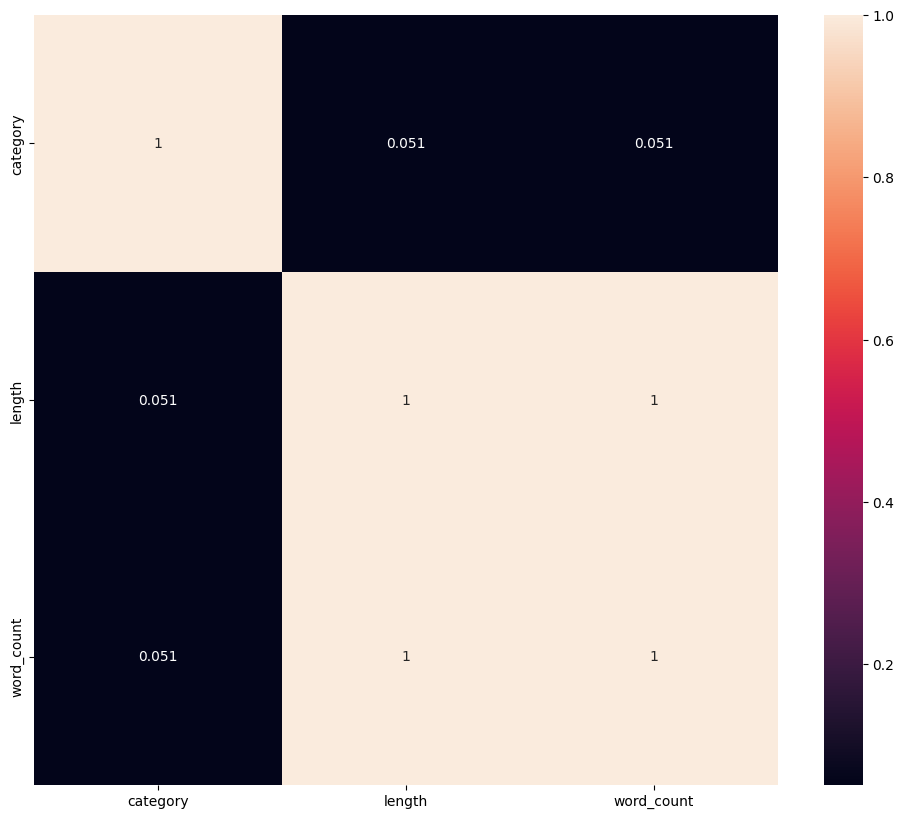

In [34]:
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot =True)

PREPROCESSING

In [35]:
data.head()

,clean_comment,category,category_new,length,word_count
0,family mormon have never tried explain them t...,1.0,Positive,39,39
1,buddhism has very much lot compatible with chr...,1.0,Positive,196,196
2,seriously don say thing first all they won get...,-1.0,Negative,86,86
3,what you have learned yours and only yours wha...,0.0,Neutral,29,29
4,for your own benefit you may want read living ...,1.0,Positive,112,112


In [36]:
data[["clean_comment","category_new"]].describe(include='all')

,clean_comment,category_new
count,200118,200118
unique,199708,3
top,,Positive
freq,116,88079


In [37]:
data.isnull().sum()

clean_comment    0
category         0
category_new     0
length           0
word_count       0
dtype: int64

In [38]:
## Reference=https://github.com/ftvalentini/kaggle-DiasasterTweets/blob/master/helpers_strings.py
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
     "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare","cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions","fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun","gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care","idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know","l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea","nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister","poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate","smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned","tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here","yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [39]:
!pip install stopwords
!pip install nltk
!pip install matplotlib

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

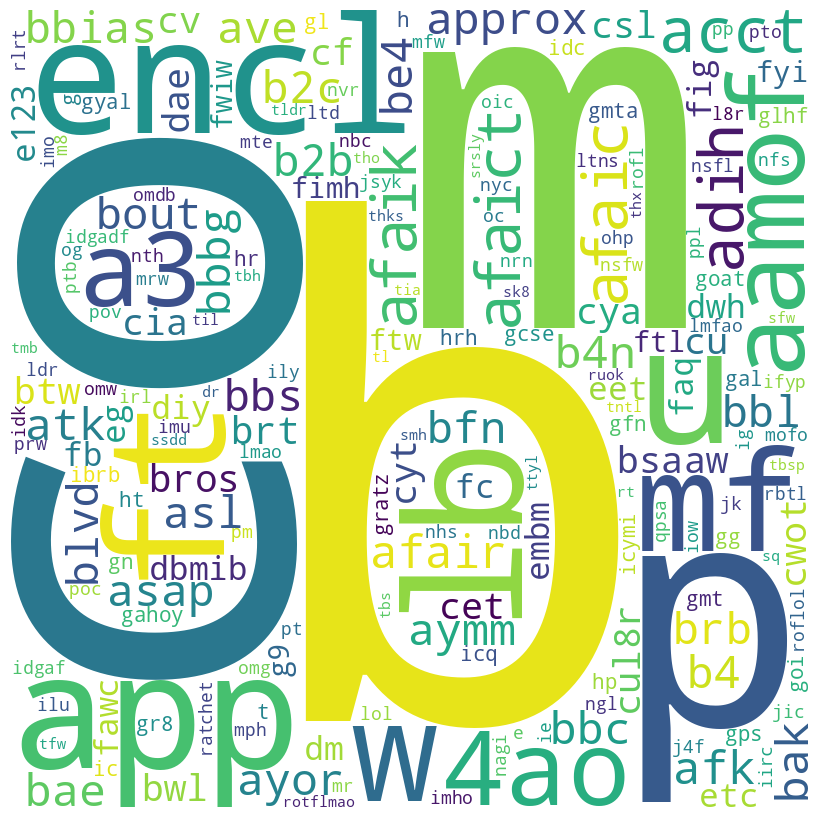

In [41]:
## WORD cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
token=[abbreviation.lower() for abbreviation in abbreviations.keys()]
comments= " ".join(token)
stopWords=set(STOPWORDS)
wordcloud=WordCloud(
    width=800,
    height=800,
    background_color='white',
    stopwords=stopWords,
    min_font_size=10
).generate(comments)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [42]:
#Remove all URLs, replace by URL
def URL_remove(word):
    url=re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'URL',str(word))
#Remove HTML beacon
def HTML_remove(word):
    html=re.compile(r'<.*?>')
    return html.sub(r'',word)
#Remove non printable characters
def ASCII_not_remove(word):
    text=''.join([i for i in word if i in string.printable])
    return text
#Change an abbreviation by its meaning
def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word
#Replace all abbreviations
def replace_abbrev(word):
    strings=""
    for i in word.split():
        strings+= word_abbrev(i) + " "
    return strings
#Remove @ and mention, replace by USER
def mention_remove(words):
    att=re.compile(r'@\S+')
    return att.sub(r'USER',words)
#Remove numbers, replace it by NUMBER
def number_remove(words):
    num=re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'NUMBER',words)
#Replace some others smileys with SADFACE
def sad_transcription(words):
    eyes="[8:=;]"
    nose="['`\-]"
    smiley=re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smiley.sub(r'SADFACE',words)
#Replace some smileys with SMILE
def smile_transcription(words):
    eyes="[8:=;]"
    nose="['`\-]"
    smiley=re.compile(r'[8:=;][\'\-]?[)dDp]')
    return smiley.sub(r'SMILE',words)
#Replace <3 with HEART
def heart_transcription(words):
    heartt=re.compile(r'<3')
    return heartt.sub(r'HEART',words)
#Factorize elongated words, add ELONG
def remove_elongated(words):
    elong=re.compile(r'\b(\S*?)([a-z])\2{2,}\b')
    return elong.sub(r'\1\2 ELONG',words)
#Factorize repeated punctuation, add REPEAT
def remove_repeat_punctuation(words):
    repeat=re.compile(r'([!?.]){2,}')
    return repeat.sub(r'\1 REPEAT',words)
#Remove all punctuations
def remove_all_punctuations(words):
    table1=str.maketrans('','',string.punctuation)
    return text.translate(table1)
#Remove punctuations
def remove_punctuations(words):
    punctuations='@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for i in punctuations:
        words=words.replace(i, f' {i} ')
    words=words.replace('...', ' ... ')
    if '...' not in words:
        words=words.replace('..', ' ... ')
    return words
#Remove all english stopwords
def remove_stopwords(words):
    words=' '.join([word for word in words.split() if word not in stopwords.words("english")])
    return words
def stemming(words):
    stemm=PorterStemmer()
    words=' '.join([stemm.stem(i) for i in text.split()])
    return words
def lemmatization(words):
    lemmi=WordNetLemmatizer()
    texts=' '.join([lemmi.lemmatize(word,pos='v') for word in words.split()])
    return texts

In [43]:
def text_cleaning(words):
    sentence=URL_remove(words)
    sentence=HTML_remove(words)
    sentence=ASCII_not_remove(words)
    sentence=replace_abbrev(words)
    sentence=mention_remove(words)
    sentence=number_remove(words)
    sentence=sad_transcription(words)
    sentence=smile_transcription(words)
    sentence=heart_transcription(words)
    sentence=remove_elongated(words)
    sentence=remove_repeat_punctuation(words)
    sentence=remove_all_punctuations(words)
    sentence=remove_punctuations(words)
    sentence=lemmatization(words)
    sentence=text.lower()
    return sentence

In [44]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [45]:
data["clean_comment"]=data["clean_comment"].apply(text_cleaning)

In [47]:
a=[]
for i in data['clean_comment']:
    a.append(i)

In [48]:
maximumlength=max([len(i) for i in a])
print ('Maximum sequence length in the list of sentences:', maximumlength)

Maximum sequence length in the list of sentences: 8376


In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer
token=Tokenizer(num_words=50000,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True)
token.fit_on_texts(data['clean_comment'].values)
index=token.word_index
print('Found %s unique tokens.' % len(index))

Found 116600 unique tokens.


In [50]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maximumlength=3000
X=token.texts_to_sequences(data['clean_comment'].values)
X=pad_sequences(X,maxlen=maximumlength)

In [51]:
Y=pd.get_dummies(data['category'],columns=data["category"]).values

In [52]:
from sklearn.preprocessing import LabelBinarizer
labelbin=LabelBinarizer()
labelbin.fit(data['category'])


MODEL ARCHITECTURE

In [58]:
import tensorflow as tf
tpu=tf.distribute.cluster_resolver.TPUClusterResolver.connect()
tpu_strategy_1=tf.distribute.TPUStrategy(tpu)
with tpu_strategy_1.scope():
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(1000,100,input_length=maximumlength))
    model.add(tf.keras.layers.SpatialDropout1D(0.3))
    model.add(tf.keras.layers.LSTM(100, dropout=0.3, recurrent_dropout=0.2))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3000, 100)         100000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 3000, 100)        0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 180,703
Trainable params: 180,703
Non-trainable params: 0
_________________________________________________________________


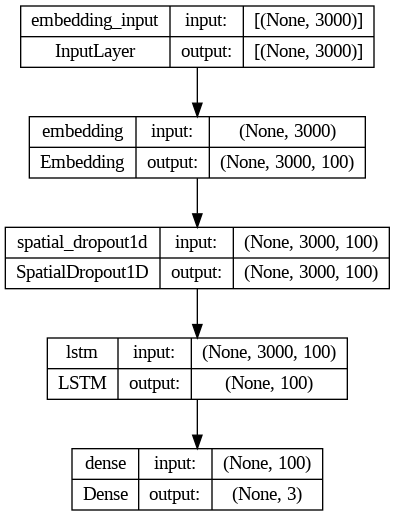

In [55]:
from keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True)


In [59]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=42)

In [60]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop=model.fit(train_X, train_y,epochs=5, batch_size=10*tpu_strategy.num_replicas_in_sync,validation_split=0.20,callbacks=[EarlyStopping(monitor='val_loss',patience=3, min_delta=0.0001)])

Epoch 1/5
1489/1489 [==============================] - 1581s 1s/step - loss: 0.5716 - accuracy: 0.7837 - val_loss: 0.5041 - val_accuracy: 0.8214
Epoch 2/5
1489/1489 [==============================] - 1564s 1s/step - loss: 0.4918 - accuracy: 0.8237 - val_loss: 0.4870 - val_accuracy: 0.8263
Epoch 3/5
1489/1489 [==============================] - 1563s 1s/step - loss: 0.4767 - accuracy: 0.8282 - val_loss: 0.4803 - val_accuracy: 0.8272
Epoch 4/5
1489/1489 [==============================] - 1563s 1s/step - loss: 0.4651 - accuracy: 0.8325 - val_loss: 0.4787 - val_accuracy: 0.8323
Epoch 5/5
1489/1489 [==============================] - 1563s 1s/step - loss: 0.4549 - accuracy: 0.8348 - val_loss: 0.4658 - val_accuracy: 0.8331


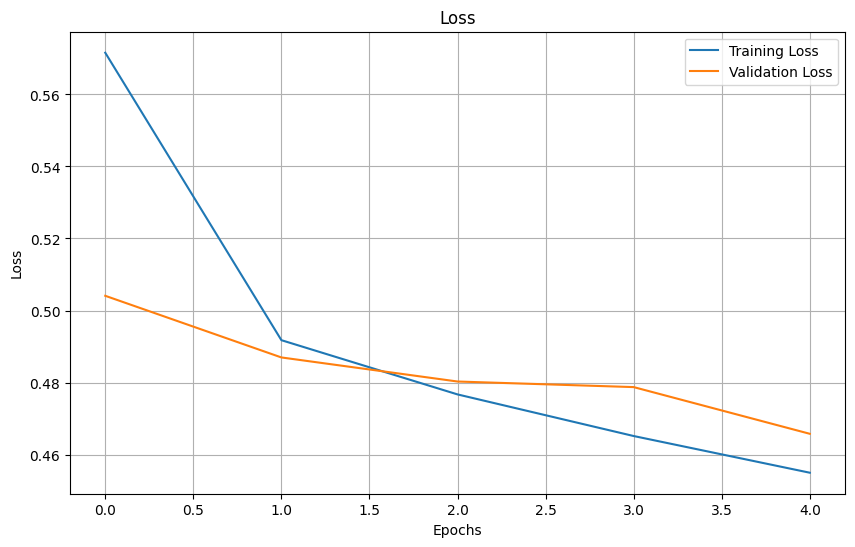

In [63]:
## Loss and ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.title('Loss')
plt.plot(earlystop.earlystop['loss'],label='Training Loss')
plt.plot(earlystop.earlystop['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


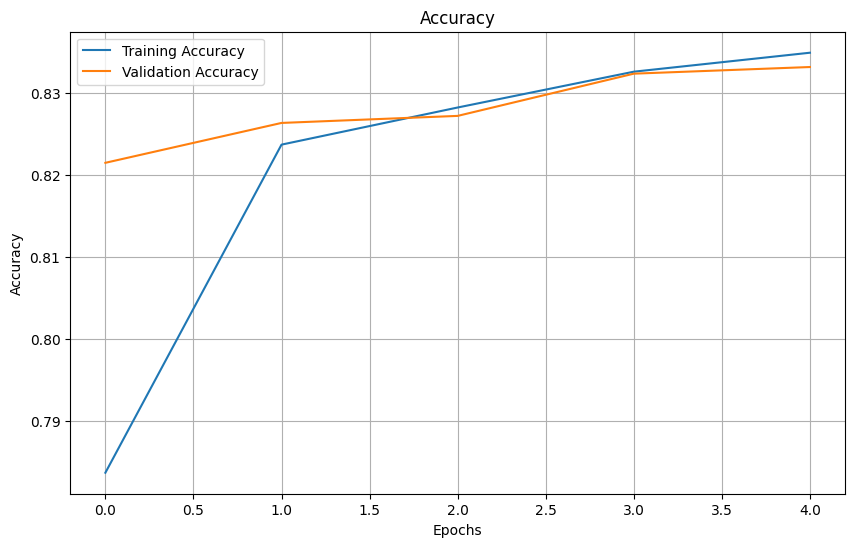

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('Accuracy')
plt.plot(earlystop.earlystop['accuracy'],label='Training Accuracy')
plt.plot(earlystop.earlystop['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


1877/1877 [==============================] - 139s 72ms/step


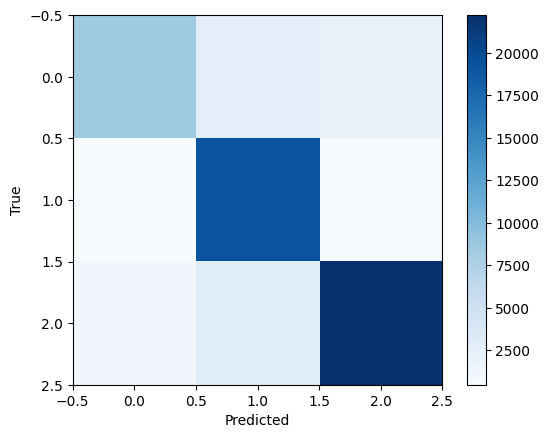

In [65]:
from sklearn.metrics import confusion_matrix
confusemat=confusion_matrix(test_y.argmax(axis=1),model.predict(test_X).argmax(axis=1))
# Plot the confusion matrix
plt.imshow(confusemat,interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [68]:
#generate classification report
from sklearn.metrics import classification_report
print(classification_report(test_y.argmax(axis=1),model.predict(test_X).argmax(axis=1)))

1877/1877 [==============================] - 135s 72ms/step
              precision    recall  f1-score   support

           0       0.83      0.64      0.73     13215
           1       0.78      0.94      0.85     20410
           2       0.88      0.84      0.86     26411

    accuracy                           0.83     60036
   macro avg       0.83      0.81      0.81     60036
weighted avg       0.84      0.83      0.83     60036



MACHINE LEARNING MODELS

In [69]:
data_twitter=pd.read_csv("Twitter_Data.csv")

In [70]:
data_reddit=pd.read_csv("Reddit_Data.csv")

In [71]:
import string
def cleanText(text):
    clean_text=''.join(char for char in text if char.isalpha() or char.isspace())
    final_text=' '.join(clean_text.split()).lower()
    return final_text


In [72]:
reddit_data = data_reddit.dropna(how='any')
twitter_data =data_twitter.dropna(how='any')

In [73]:
# Rename columns
reddit_data=reddit_data.rename(columns={'clean_comment': 'comment'})
twitter_data=twitter_data.rename(columns={'clean_text': 'comment'})
#Convert 'category' column to integers
reddit_data['category']=reddit_data['category'].astype(int)
twitter_data['category']=twitter_data['category'].astype(int)
#Clean the 'comment' column using the cleanText function
reddit_data['comment']=reddit_data['comment'].apply(cleanText)
twitter_data['comment']=twitter_data['comment'].apply(cleanText)


In [74]:
# Remove duplicate
reddit_data=reddit_data.drop_duplicates(subset='comment', keep=False)
twitter_data=twitter_data.drop_duplicates(subset='comment', keep=False)

In [75]:
# Concat reddit data and twiter data
data=pd.concat([reddit_data,twitter_data],ignore_index=True)
data.drop_duplicates(subset='comment', keep=False, inplace=True)

In [76]:
from wordcloud import WordCloud, STOPWORDS
sentiment_words={-1: '', 0: '', 1: ''}
stopwords=set(STOPWORDS)
for comment,category in zip(data.comment,data.category):
    tokens=comment.split()
    sentiment_words[category]+=' '.join(tokens) + ' '
negative_words=sentiment_words[-1]
neutral_words=sentiment_words[0]
positive_words=sentiment_words[1]

In [77]:
negative_cloud=WordCloud(width=700,height=700,
                background_color='white',
                stopwords=stopwords,
                min_font_size=12).generate(negative_words)

neutral_cloud=WordCloud(width=700,height=700,
                background_color='white',
                stopwords=stopwords,
                min_font_size=12).generate(neutral_words)

positive_cloud = WordCloud(width=700,height=700,
                background_color='white',
                stopwords=stopwords,
                min_font_size=12).generate(positive_words)

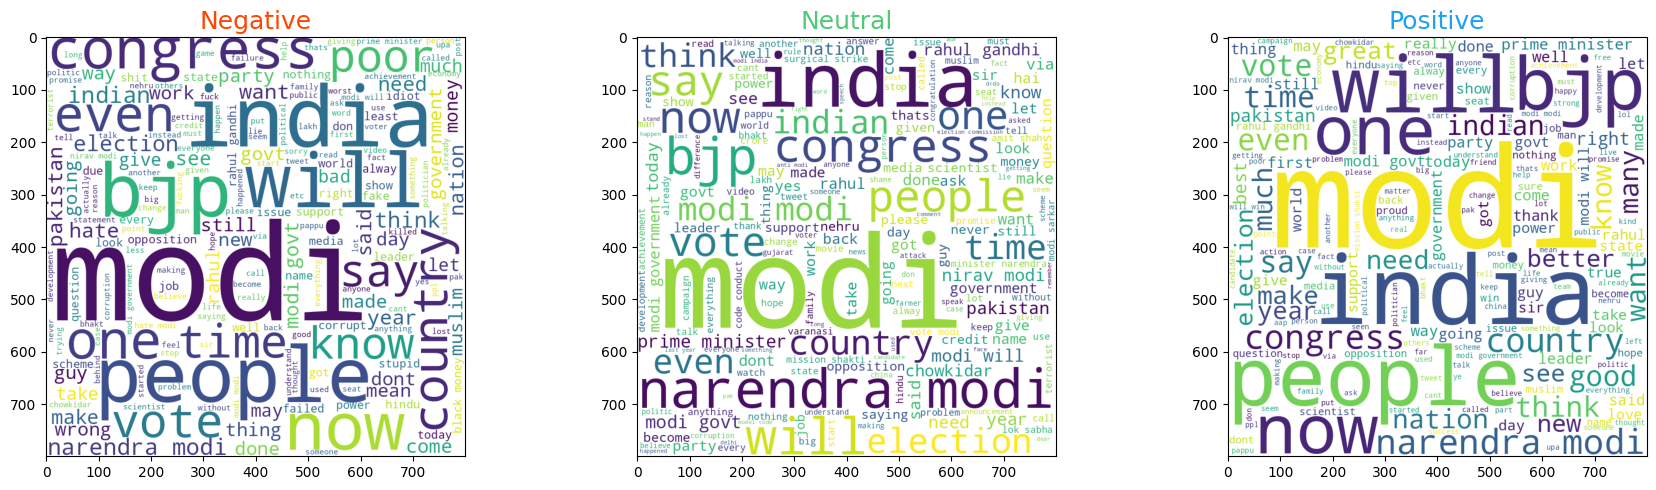

In [78]:
titles=['Negative', 'Neutral', 'Positive']
colors=['#ff4500', '#50C878', '#1DA1F2']
clouds=[negative_cloud, neutral_cloud, positive_cloud]
fig, axes = plt.subplots(1, 3, figsize=(18, 5), facecolor=None)
for ax, title,color, cloud in zip(axes, titles, colors,clouds):
    ax.imshow(cloud)
    ax.set_title(title, fontsize=18, color=color)
plt.tight_layout()
plt.show()

In [79]:
class Text:
    def __init__(self,dataframe):
        self.dataframe=dataframe
    def datafix(self):
        data_frame=self.dataframe
        smallest_len=min(data_frame['category'].value_counts())
        final_data=datafra.groupby('category').apply(lambda x: x.sample(samllest_len)).reset_index(drop=True)
        return final_data

In [80]:
b=Text(data)
fixed_dataframe=b.datafix()
print(f'Before:\n{concat_df.category.value_counts()}\n')
print(f'After:\n{fixed_dataframe.category.value_counts()}')

Before:
 1    85581
 0    64771
-1    42628
Name: category, dtype: int64

After:
-1    42628
 0    42628
 1    42628
Name: category, dtype: int64


In [81]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split([i for i in fixed_dataframe.comment],[i for i in fixed_dataframe.category],test_size=0.3,random_state=1)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
train_X_vectors=vector.fit_transform(train_X)
test_X_vectors=vector.transform(test_X)

In [83]:
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

SUPPORT VECTOR MACHINE

In [ ]:
svm_model=LinearSVC()
svm_model.fit(train_X_vectors,train_y)
prediction_svm=svm_model.predict(test_X_vectors)

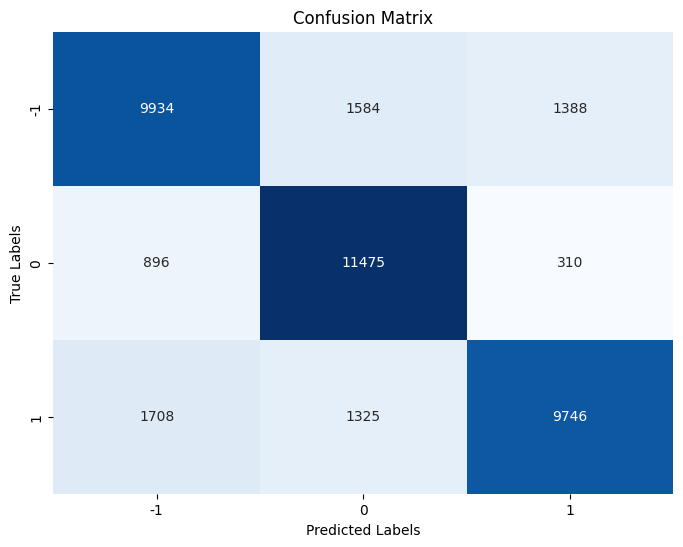


Classification Report:
              precision    recall  f1-score   support

          -1       0.79      0.77      0.78     12906
           0       0.80      0.90      0.85     12681
           1       0.85      0.76      0.80     12779

    accuracy                           0.81     38366
   macro avg       0.81      0.81      0.81     38366
weighted avg       0.81      0.81      0.81     38366



In [86]:
svm_prediction=svm.predict(test_X_vectors)
confusion_mat=confusion_matrix(test_y,svm_prediction, labels=[-1, 0, 1])
fig, ax=plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels([-1, 0, 1])
ax.set_yticklabels([-1, 0, 1])
plt.title('Confusion Matrix')
plt.show()
class_report=classification_report(test_y, rfc_prediction, labels=[-1, 0, 1])
print("\nClassification Report:")
print(class_report)

ADABOOST

In [87]:
estimator=DecisionTreeClassifier(max_depth=1)
adaboost=AdaBoostClassifier(base_estimator=estimator)
adaboost.fit(train_X_vectors, train_y)
predictions_ada=adaboost.predict(test_X_vectors)
accuracy=accuracy_score(test_y,predictions_ada)
print(f'Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Accuracy: 0.6865453787207423


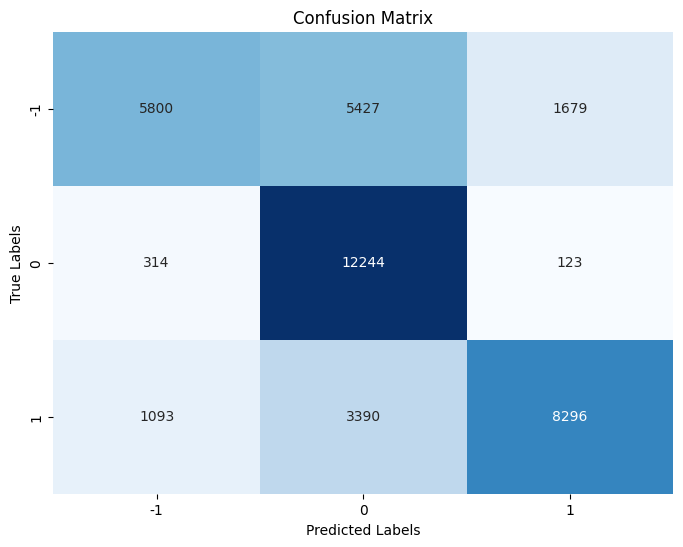


Classification Report:
              precision    recall  f1-score   support

          -1       0.80      0.45      0.58     12906
           0       0.58      0.97      0.73     12681
           1       0.82      0.65      0.73     12779

    accuracy                           0.69     38366
   macro avg       0.74      0.69      0.68     38366
weighted avg       0.74      0.69      0.68     38366



In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
predictions_ada=adaboost.predict(test_X_vectors)
confusion_matrix=confusion_matrix(test_y,predictions_ada, labels=[-1, 0, 1])
fig,ax=plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels([-1, 0, 1])
ax.set_yticklabels([-1, 0, 1])
plt.title('Confusion Matrix')
plt.show()
class_report=classification_report(test_y,predictions_ada,labels=[-1, 0, 1])
print("\nClassification Report:")
print(class_report)

NAIVE BAYES

In [89]:
naive=MultinomialNB()
naive.fit(train_X_vectors, train_y)
prediction_nb=naive.predict(test_X_vectors)
print(f'Accuracy:{naive.score(test_X_vectors, test_y)}')
print(f'Accuracy:{f1_score(test_y,prediction_nb, average=None, labels=[-1, 0, 1])}')

Accuracy:0.7005421466923839
Accuracy:[0.72518707 0.61969933 0.73049253]


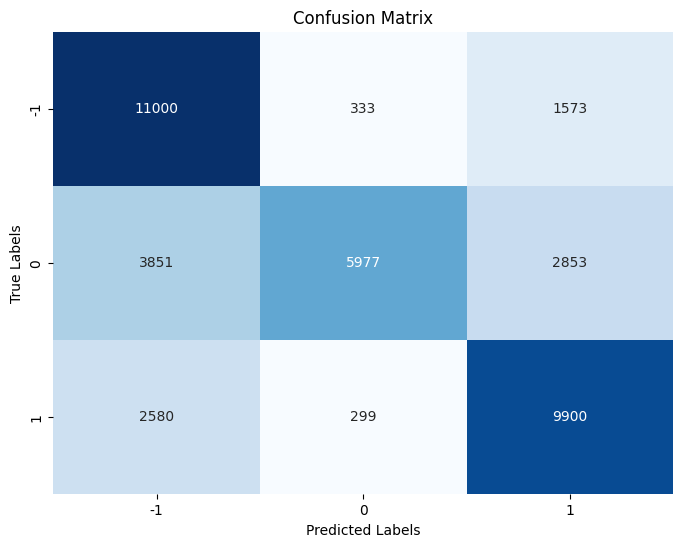


Classification Report:
              precision    recall  f1-score   support

          -1       0.63      0.85      0.73     12906
           0       0.90      0.47      0.62     12681
           1       0.69      0.77      0.73     12779

    accuracy                           0.70     38366
   macro avg       0.74      0.70      0.69     38366
weighted avg       0.74      0.70      0.69     38366



In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix_nb=confusion_matrix(test_y, prediction_nb, labels=[-1, 0, 1])
fig, ax=plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels([-1, 0, 1])
ax.set_yticklabels([-1, 0, 1])
plt.title('Confusion Matrix')
plt.show()
# Calculate and print the classification report
class_report_nb = classification_report(test_y, predictions_nb, labels=[-1, 0, 1])
print("\nClassification Report:")
print(class_report_nb)


DECISION TREE

In [99]:
decitree=DecisionTreeClassifier()
decitree.fit(train_X_vectors, train_y)
prediction_tree=decitree.predict(test_X_vectors)
print(f'Accuracy:{decitree.score(test_X_vectors,test_y)}')
print(f'Accuracy:{f1_score(test_y,prediction_tree, average=None, labels=[-1, 0, 1])}')

Accuracy:0.7791012875983944
Accuracy:[0.72935743 0.84938327 0.75465084]


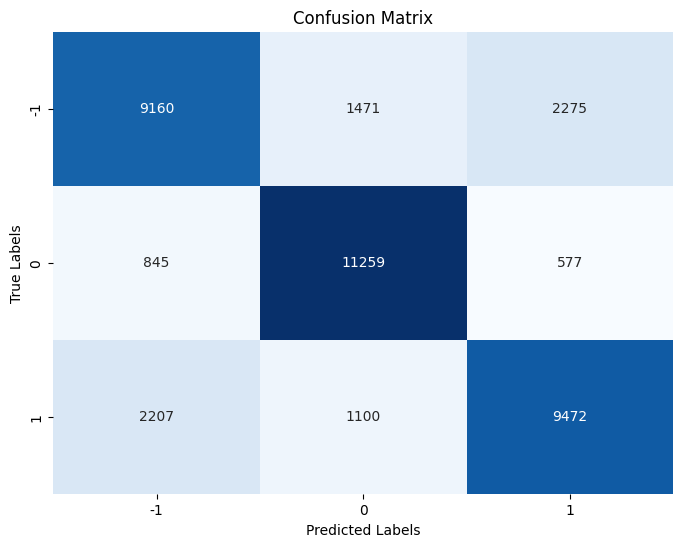


Classification Report:
              precision    recall  f1-score   support

          -1       0.75      0.71      0.73     12906
           0       0.81      0.89      0.85     12681
           1       0.77      0.74      0.75     12779

    accuracy                           0.78     38366
   macro avg       0.78      0.78      0.78     38366
weighted avg       0.78      0.78      0.78     38366



In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
predictions_tree=decitree.predict(test_X_vectors)
confusion_matrix=confusion_matrix(test_y,predictions_tree, labels=[-1, 0, 1])
fig,ax=plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels([-1, 0, 1])
ax.set_yticklabels([-1, 0, 1])
plt.title('Confusion Matrix')
plt.show()
class_report=classification_report(test_y,predictions_tree,labels=[-1, 0, 1])
print("\nClassification Report:")
print(class_report)

In [ ]:
## Hyper tuning

param_grid={
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

decision=DecisionTreeClassifier()
grid_search=GridSearchCV(decision,param_grid,cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(train_X_vectors,train_y)
param_best=grid_search.best_params_
best_estimator=grid_search.best_estimator_
print("Best Parameters:")
print(param_best)
y_pred=best_estimator.predict(test_X_vectors)
accuracy=accuracy_score(test_y,y_pred)
f1=f1_score(test_y, y_pred, average=None, labels=[-1, 0, 1])
print(f'Accuracy: {accuracy}')
print(f'F1-Scores: {f1}')

## Artificial Neural Network

In [103]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

data=Data(fixed_dataframe)
final_df=data.datafix()
X=final_df['comment'].values
Y=final_df['category'].values
encoder=LabelEncoder()
Y=encoder.fit_transform(Y)
vector=TextVectorization(max_tokens=10000,output_mode='int')
vector.adapt(X)
X=vector(X)
X=X.numpy()
Y=Y.astype(np.int32)
#Split the data into training and testing sets
train_X,test_X,train_y,test_y=train_test_split(X,Y, test_size=0.25, random_state=1)
#Standardize the input data
scaler_1=StandardScaler()
train_X=scaler_1.fit_transform(train_X)
test_X=scaler_1.transform(test_X)

model=keras.Sequential([
    keras.layers.Input(shape=(train_X.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_X, train_y, epochs=10, batch_size=64, validation_split=0.2)
test_loss,test_accuracy=model.evaluate(test_X, test_y)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
1199/1199 [==============================] - 13s 10ms/step - loss: 1.0711 - accuracy: 0.4556 - val_loss: 1.0293 - val_accuracy: 0.4608
Epoch 2/10
1199/1199 [==============================] - 11s 9ms/step - loss: 1.0192 - accuracy: 0.4696 - val_loss: 1.0205 - val_accuracy: 0.4643
Epoch 3/10
1199/1199 [==============================] - 10s 9ms/step - loss: 1.0078 - accuracy: 0.4744 - val_loss: 1.0277 - val_accuracy: 0.4628
Epoch 4/10
1199/1199 [==============================] - 11s 9ms/step - loss: 1.0029 - accuracy: 0.4779 - val_loss: 1.0359 - val_accuracy: 0.4621
Epoch 5/10
1199/1199 [==============================] - 11s 9ms/step - loss: 1.0053 - accuracy: 0.4812 - val_loss: 1.0424 - val_accuracy: 0.4529
Epoch 6/10
1199/1199 [==============================] - 10s 8ms/step - loss: 1.0052 - accuracy: 0.4840 - val_loss: 1.0330 - val_accuracy: 0.4610
Epoch 7/10
1199/1199 [==============================] - 11s 9ms/step - loss: 0.9920 - accuracy: 0.4879 - val_loss: 1.0389 - val_a

1000/1000 [==============================] - 12s 12ms/step


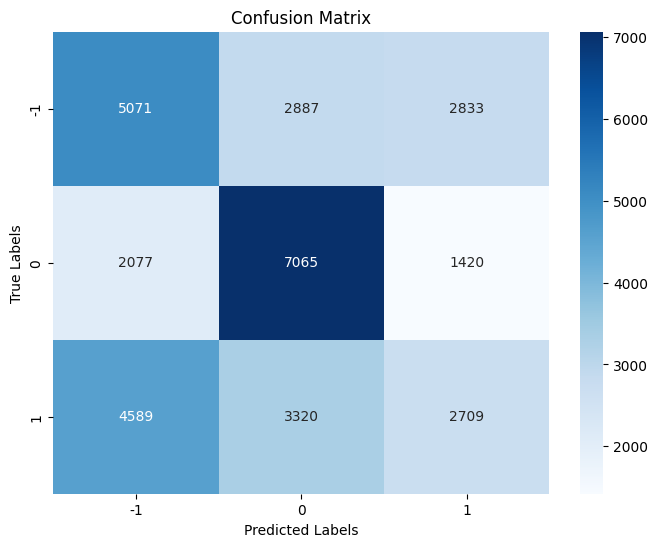

              precision    recall  f1-score   support

          -1       0.43      0.47      0.45     10791
           0       0.53      0.67      0.59     10562
           1       0.39      0.26      0.31     10618

    accuracy                           0.46     31971
   macro avg       0.45      0.46      0.45     31971
weighted avg       0.45      0.46      0.45     31971



In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
predictions_ann=model.predict(test_X)
predicted=np.argmax(predictions_ann,axis=1)
confusionmatrix=confusion_matrix(test_y,predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
target_names = [str(label) for label in encoder.classes_]
report = classification_report(test_y, predicted, target_names=target_names)
print(report)
